<a href="https://colab.research.google.com/github/karthickselvkumar/SUPPORT-VECTOR-MACHINE/blob/main/SUPPORT_VECTOR_MACHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
import seaborn as sns
df=pd.read_csv('/archive (1).zip')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
 df['Drug'].value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df.duplicated().sum()

np.int64(0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde119fb770>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde117e0380>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde119faf90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde117e0d70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde117e10d0>],
 'means': []}

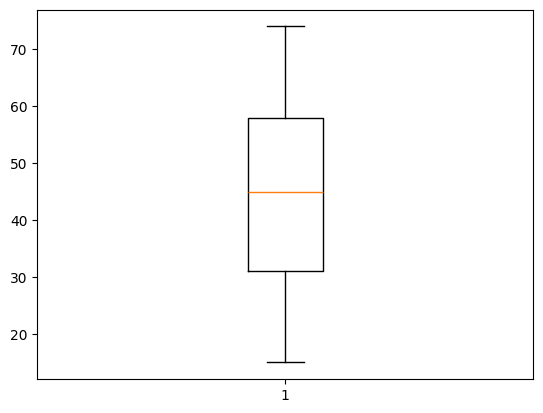

In [ ]:
plt.boxplot(df['Age'])

<Axes: xlabel='Cholesterol', ylabel='count'>

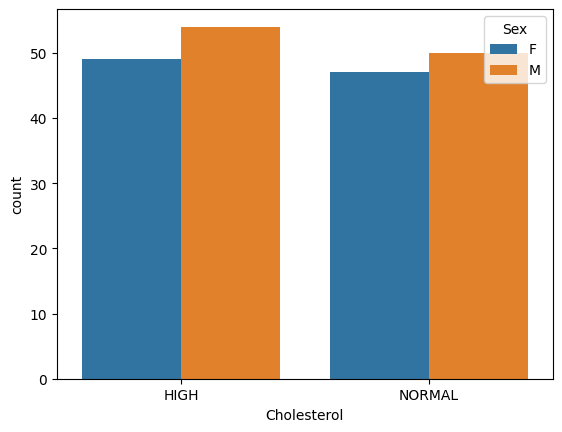

In [ ]:
sns.countplot(x= 'Cholesterol',data = df, hue = 'Sex')

In [ ]:
#MORE MEN ARE HAVING HIGH CHOLESTROL THAN WOMEN

<Axes: xlabel='BP', ylabel='count'>

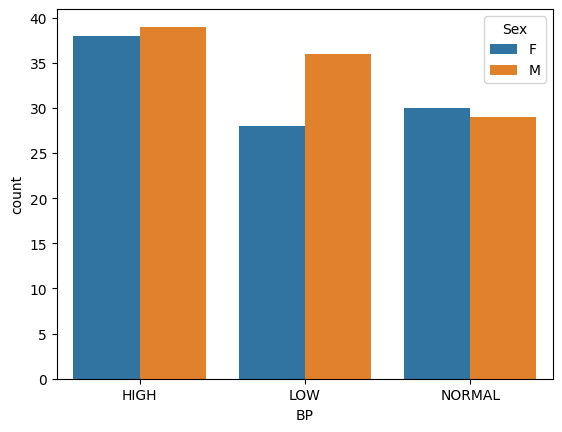

In [ ]:
sns.countplot(x='BP',data=df,hue='Sex')

In [ ]:
 #men are having more bp than women and the same time men are having low bp than women

/tmp/ipython-input-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

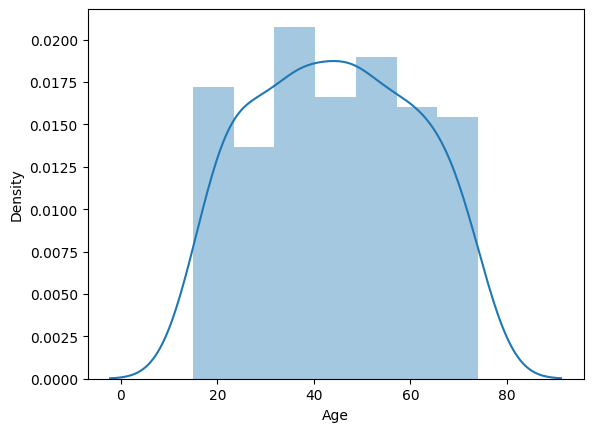

In [ ]:
sns.distplot(df['Age'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column's data type is 'object' (categorical)
    if df[col].dtype == 'object':
        # Apply LabelEncoder to the column and replace the original column with the encoded values
        df[col] = le.fit_transform(df[col])
        # Print the classes found by the encoder for the current column
        print(f"Classes for column '{col}': {le.classes_}")

# Display the first few rows of the modified DataFrame
df.head()

Classes for column 'Sex': ['F' 'M']
Classes for column 'BP': ['HIGH' 'LOW' 'NORMAL']
Classes for column 'Cholesterol': ['HIGH' 'NORMAL']
Classes for column 'Drug': ['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [ ]:
#split the data into features and target
x = df.drop('Drug',axis = 1)
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [ ]:
y= df['Drug']
y

,Drug
0,0
1,3
2,3
3,4
4,0
...,...
195,3
196,3
197,4
198,4


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.3 , random_state = 1)

In [ ]:
#MODEL BUILDING PART OF SVM
from sklearn.svm import SVC
svm_model = SVC(kernel = "rbf",C= 100
                )
svm_model.fit(x_train,y_train)

#testing
y_pred = svm_model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.57      1.00      0.73         4
           2       0.75      0.50      0.60         6
           3       1.00      0.50      0.67         4
           4       0.95      1.00      0.97        19

    accuracy                           0.92        60
   macro avg       0.85      0.80      0.79        60
weighted avg       0.93      0.92      0.91        60

